##Boston 주택 가격 예측

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, activation='relu', name='dense_input', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu', name='dense'))
model.add(Dense(64, activation='relu', name='dense_1'))
model.add(Dense(1, name='dense_2'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/100
29/29 [==============================] - 0s 10ms/step - loss: 517.0564 - mae: 20.6824 - val_loss: 486.0328 - val_mae: 19.8606
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 368.4645 - mae: 16.4454 - val_loss: 299.9988 - val_mae: 14.8669
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 188.4088 - mae: 11.3387 - val_loss: 124.6843 - val_mae: 9.1218
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 84.4444 - mae: 7.0070 - val_loss: 57.8241 - val_mae: 5.9426
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 51.6522 - mae: 5.3010 - val_loss: 35.7178 - val_mae: 4.3286
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 38.1515 - mae: 4.2657 - val_loss: 27.8780 - val_mae: 3.7541
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 31.3725 - mae: 3.7903 - val_loss: 25.7245 - val_mae: 3.5127
Epoch 8/100
29/29 [==============================] - 0s 7

<ipython-input-7-2b4fe00e41cb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


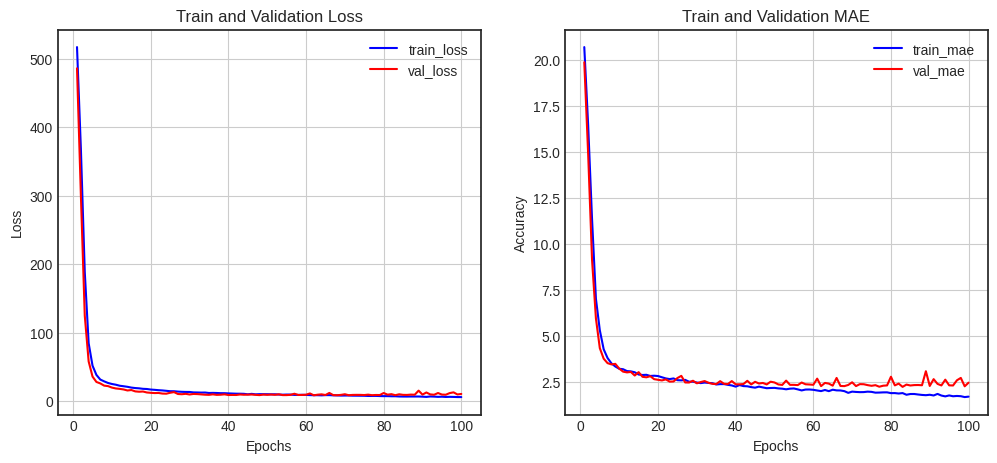

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 22.4727 - mae: 2.8702


[22.472719192504883, 2.8701772689819336]

## Reuters 뉴스 기사 주제 분류

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train, y_train), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(train_labels))
print(test_labels.shape)


2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
6736
(2246,)


In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
val_labels = utils.to_categorical(val_labels)

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(10000, ), name = 'dense_24_input'))
model.add(layers.Dense(128, name='dense_24'))
model.add(layers.BatchNormalization(name = 'batch_normalization_14'))
model.add(layers.Activation('relu', name = 'activation_14')) 
model.add(layers.Dropout(0.5, name = 'dropout_14'))
model.add(layers.Dense(128, name='dense_25'))
model.add(layers.BatchNormalization(name = 'batch_normalization_15'))
model.add(layers.Activation('relu', name = 'activation_15'))
model.add(layers.Dropout(0.5, name = 'dropout_15'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 128)               0         
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                     

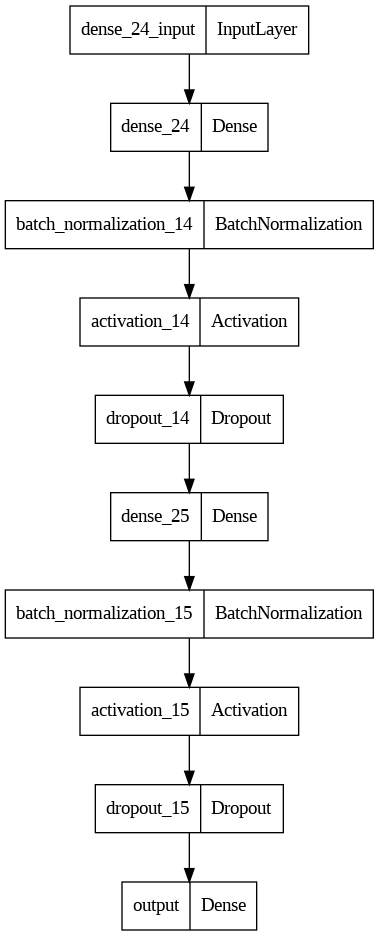

In [13]:
model.summary()
utils.plot_model(model)

In [14]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, train_labels, epochs=10,
                    validation_data=(x_val, val_labels),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
211/211 [==============================] - 4s 8ms/step - loss: 1.8713 - accuracy: 0.5707 - val_loss: 1.4323 - val_accuracy: 0.7146
Epoch 2/10
211/211 [==============================] - 1s 6ms/step - loss: 1.2812 - accuracy: 0.7001 - val_loss: 1.1882 - val_accuracy: 0.7560
Epoch 3/10
211/211 [==============================] - 1s 6ms/step - loss: 1.0855 - accuracy: 0.7485 - val_loss: 1.1545 - val_accuracy: 0.7738
Epoch 4/10
211/211 [==============================] - 2s 8ms/step - loss: 0.9484 - accuracy: 0.7739 - val_loss: 1.1328 - val_accuracy: 0.7805
Epoch 5/10
211/211 [==============================] - 1s 7ms/step - loss: 0.8542 - accuracy: 0.7951 - val_loss: 1.1277 - val_accuracy: 0.7863
Epoch 6/10
211/211 [==============================] - 1s 6ms/step - loss: 0.7801 - accuracy: 0.8112 - val_loss: 1.1473 - val_accuracy: 0.7934
Epoch 7/10
211/211 [==============================] - 1s 6ms/step - loss: 0.7168 - accuracy: 0.8259 - val_loss: 1.1356 - val_accuracy: 0.8019
Epoch 

<ipython-input-15-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


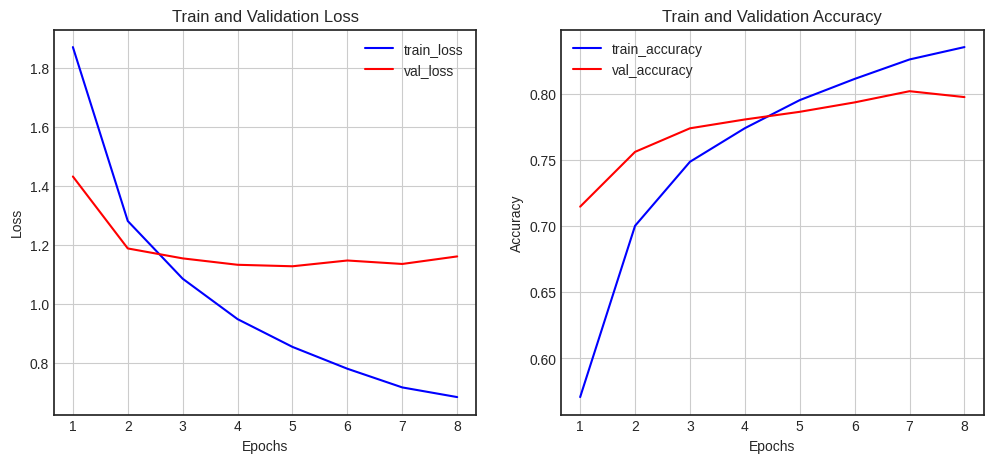

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [16]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.1528 - accuracy: 0.7680


[1.1528345346450806, 0.7680320739746094]

## CIFAR10 이미지 분류

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [19]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-20-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


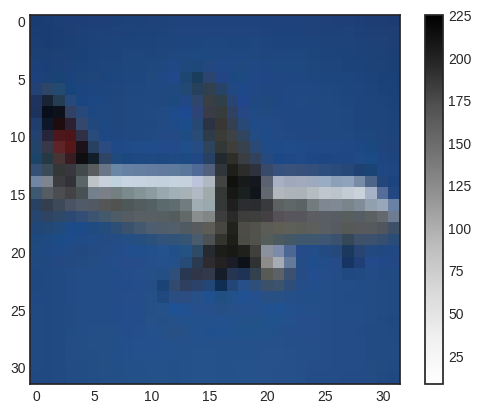

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(3072, ), name = 'input_15'))
model.add(layers.Dense(2048, name='dense_91'))
model.add(layers.BatchNormalization(name = 'batch_normalization_66'))
model.add(layers.Activation('relu', name = 'activation_66')) 
model.add(layers.Dropout(0.5, name = 'dropout_66'))
model.add(layers.Dense(1024, name='dense_92'))
model.add(layers.BatchNormalization(name = 'batch_normalization_67'))
model.add(layers.Activation('relu', name = 'activation_67'))
model.add(layers.Dropout(0.5, name = 'dropout_67'))
model.add(layers.Dense(512, name='dense_93'))
model.add(layers.BatchNormalization(name = 'batch_normalization_68'))
model.add(layers.Activation('relu', name = 'activation_68'))
model.add(layers.Dropout(0.5, name = 'dropout_68'))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_66 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 activation_66 (Activation)  (None, 2048)              0         
                                                                 
 dropout_66 (Dropout)        (None, 2048)              0         
                                                                 
 dense_92 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_67 (Bat  (None, 1024)             4096      
 chNormalization)                                     

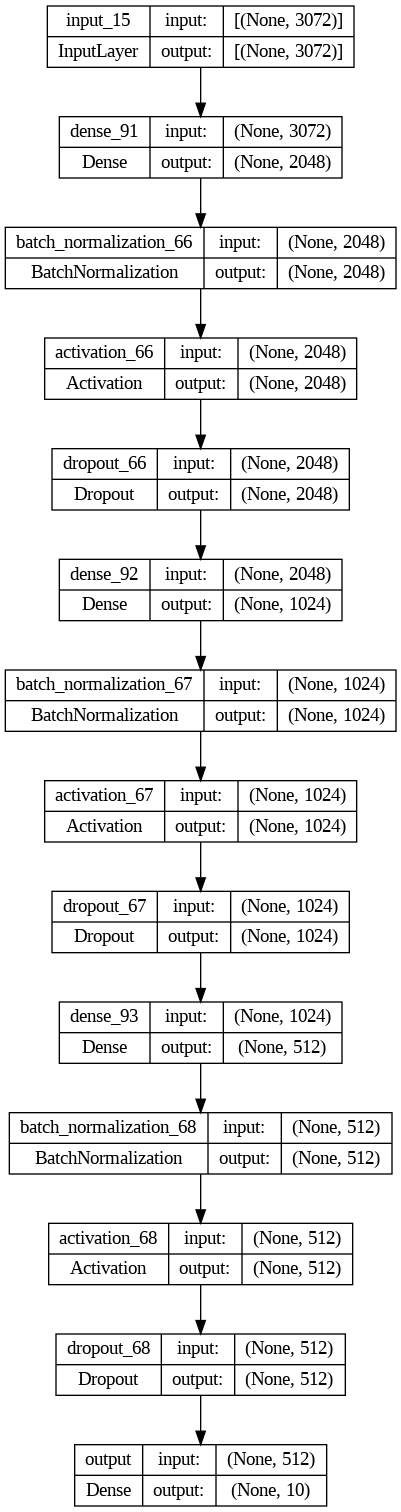

In [26]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#체크 포인트
check_point_cb = ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)

# 얼리 스토핑 콜백 함수
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/300
79/79 [==============================] - 5s 20ms/step - loss: 2.1143 - sparse_categorical_accuracy: 0.2867 - val_loss: 2.9862 - val_sparse_categorical_accuracy: 0.2081
Epoch 2/300
79/79 [==============================] - 1s 13ms/step - loss: 1.7656 - sparse_categorical_accuracy: 0.3733 - val_loss: 1.8426 - val_sparse_categorical_accuracy: 0.3346
Epoch 3/300
79/79 [==============================] - 1s 13ms/step - loss: 1.6188 - sparse_categorical_accuracy: 0.4181 - val_loss: 1.8443 - val_sparse_categorical_accuracy: 0.3118
Epoch 4/300
79/79 [==============================] - 1s 13ms/step - loss: 1.5394 - sparse_categorical_accuracy: 0.4494 - val_loss: 1.7921 - val_sparse_categorical_accuracy: 0.3421
Epoch 5/300
79/79 [==============================] - 1s 13ms/step - loss: 1.4772 - sparse_categorical_accuracy: 0.4712 - val_loss: 1.6645 - val_sparse_categorical_accuracy: 0.4065
Epoch 6/300
79/79 [==============================] - 1s 13ms/step - loss: 1.4272 - sparse_categorica

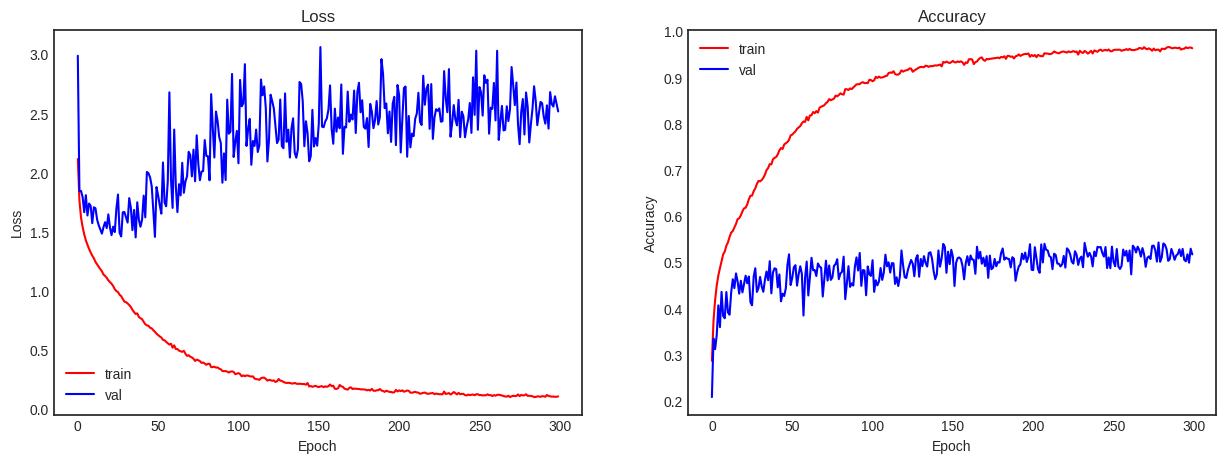

In [28]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    # loss 그래프
    ax[0].plot(history.history['loss'], 'r', label='train')
    ax[0].plot(history.history['val_loss'], 'b', label='val')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # accuracy 그래프
    ax[1].plot(history.history['sparse_categorical_accuracy'], 'r', label='train')
    ax[1].plot(history.history['val_sparse_categorical_accuracy'], 'b', label='val')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.show()
plot_history(history)

In [29]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.5263 - sparse_categorical_accuracy: 0.5178


[2.526346206665039, 0.517799973487854]